In [31]:
import pandas as pd
import numpy as np



In [261]:
df_Hospitalization_Discharge = pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
df_Demography=pd.read_excel("Cardiac_Outcomes.xlsx","Demography")
df_Patient_Precriptions=pd.read_excel("Cardiac_Outcomes.xlsx","Patient_Precriptions")
df_CardiacComplications=pd.read_excel("Cardiac_Outcomes.xlsx","CardiacComplications")
df_Labs=pd.read_excel("Cardiac_Outcomes.xlsx","Labs")
df_Responsivenes=pd.read_excel("Cardiac_Outcomes.xlsx","Responsivenes")

# Q1.How many patients were registered in each unique occupation?

In [268]:
import pandas as pd
df_Demography=pd.read_excel("Cardiac_Outcomes.xlsx","Demography")
df_Demography=df_Demography['occupation'].value_counts().to_frame('count')
df_Demography

,count
occupation,
UrbanResident,1670
farmer,198
Others,89
worker,17
Officer,7


# Q2.Divide GCS scores into slabs of 5 and count the number of patients under each band of score. Show this as any graph of your choice

<class 'dict'>


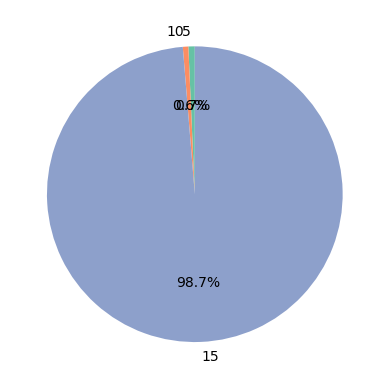

In [280]:
df_GCS=pd.read_excel("Cardiac_Outcomes.xlsx","Responsivenes",usecols="A,F")
df_GCS
#creating bands for less tahn 5, 5-10 and 10-15
df_GCS=df_GCS.mask((df_GCS['GCS']<=5) & (df_GCS['GCS']>0),5)
df_GCS=df_GCS.mask((df_GCS['GCS']<=10) & (df_GCS['GCS']>5),10)
df_GCS=df_GCS.mask((df_GCS['GCS']<=15) & (df_GCS['GCS']>10),15)

df_GCS
# grouping the no of patients in each band

x=df_GCS.groupby('GCS').size().to_dict()
#assigning the dictionary with no of patients in each band
x
print(type(x))
#plt.pie('no_of_patients',labels='GCS')
plt.pie(x.values(), labels=x.keys(),
        startangle=90, autopct='%.1f%%', colors=plt.cm.Set2.colors)


plt.show()

# Q3.Add a calculated column called Discharge date into the Hospitalization_Discharge using the information already available to you

In [269]:
df_discharge=pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge")
df_discharge=df_discharge.assign(Discharge_date=pd.to_datetime(df_discharge['Admission_date']) + pd.to_timedelta(df_discharge['dischargeDay'],'d'))
df_discharge

,inpatient_number,DestinationDischarge,admission_ward,admission_way,discharge_department,visit_times,respiratory_support,oxygen_inhalation,dischargeDay,Admission_date,...,re_admission_within_28_days,death_within_3_months,re_admission_within_3_months,death_within_6_months,re_admission_within_6_months,time_of_death__days_from_admission,readmission_time_days_from_admission,return_to_emergency_department_within_6_months,time_to_emergency_department_within_6_months,Discharge_date
0,857781,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,11,2017-01-24,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-02-04
1,743087,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,8,2017-05-05,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-05-13
2,866418,Home,Cardiology,NonEmergency,Cardiology,2,NaN,OxygenTherapy,5,2016-11-18,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2016-11-23
3,775928,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,11,2017-10-02,...,1,0,1,0,1,NaN,19.0,1.0,19.0,2017-10-13
4,810128,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,5,2019-11-17,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2019-11-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,740689,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,5,2016-02-07,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2016-02-12
2004,734280,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,8,2017-03-29,...,0,0,0,0,0,NaN,NaN,0.0,NaN,2017-04-06
2005,781004,HealthcareFacility,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,14,2018-01-22,...,0,0,1,0,1,NaN,76.0,1.0,76.0,2018-02-05
2006,744870,Unknown,Cardiology,NonEmergency,Cardiology,1,IMV,OxygenTherapy,1,2019-11-27,...,0,1,0,1,0,1.0,NaN,0.0,NaN,2019-11-28


# Q4.What percentage of patients had Biventricular heart failure?

In [270]:
import pandas as pd
df_Cardiac=pd.read_excel("Cardiac_Outcomes.xlsx","CardiacComplications")
df_Cardiac
df_Cardiac['type_of_heart_failure'].value_counts()*100
(df_Cardiac['type_of_heart_failure'].value_counts()/df_Cardiac['type_of_heart_failure'].count())*100

type_of_heart_failure
Both     73.705179
Left     23.754980
Right     2.539841
Name: count, dtype: float64

In [271]:
df_Cardiac.groupby('type_of_heart_failure').get_group('Both')

,inpatient_number,NYHA_cardiac_function_classification,Killip_grade,myocardial_infarction,congestive_heart_failure,peripheral_vascular_disease,type_of_heart_failure,LVEF,left_ventricular_end_diastolic_diameter_LV,mitral_valve_EMS,mitral_valve_AMS,EA,tricuspid_valve_return_velocity,tricuspid_valve_return_pressure
0,857781,3,3,0,0,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,743087,3,1,0,0,0,Both,NaN,40.0,1.16,1.52,NaN,3.34,47.0
2,866418,2,2,0,0,0,Both,NaN,46.0,0.84,0.12,7.00,2.80,32.0
3,775928,3,2,0,0,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,810128,3,2,0,0,0,Both,NaN,64.0,1.20,0.90,1.33,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,754589,3,2,0,1,0,Both,45.0,51.0,NaN,NaN,NaN,4.00,NaN
2003,740689,4,1,0,1,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,734280,4,2,0,1,0,Both,NaN,NaN,NaN,NaN,NaN,2.78,NaN
2005,781004,3,1,0,1,0,Both,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5.What is the ratio of patients who were responsive to pain vs responsive to sound?

In [272]:
df_responsiveness=pd.read_excel("Cardiac_Outcomes.xlsx","Responsivenes")
df_responsiveness

,inpatient_number,eye_opening,verbal_response,movement,consciousness,GCS
0,857781,4,5,6,Clear,15
1,743087,4,5,6,Clear,15
2,866418,4,5,6,Clear,15
3,775928,4,5,6,Clear,15
4,810128,4,5,6,Clear,15
...,...,...,...,...,...,...
2003,740689,4,5,6,Clear,15
2004,734280,4,5,6,Clear,15
2005,781004,4,5,6,Clear,15
2006,744870,1,1,1,Nonresponsive,3


In [273]:
x=df_responsiveness['consciousness'].value_counts()
x

consciousness
Clear                1974
ResponsiveToSound      19
Nonresponsive          11
ResponsiveToPain        4
Name: count, dtype: int64

In [274]:
print("The ratio of patients who were responsive to pain vs responsive to sound", x.iloc[3], ":", x.iloc[1])

The ratio of patients who were responsive to pain vs responsive to sound 4 : 19


# Q6.What was the average age group of the patients that had an outcome of 'Alive'?

In [287]:
import pandas as pd
import numpy as np
xls = pd.ExcelFile('Cardiac_Outcomes.xlsx')
df1 = pd.read_excel(xls, 'Hospitalization_Discharge')
df2 = pd.read_excel(xls, 'Demography')
df_merged = pd.concat([df1, df2], axis=1)
df_merged
df_merged.groupby('outcome_during_hospitalization').get_group('Alive')
#Avg_age = df_merged['ageCat'].mean()

,inpatient_number,DestinationDischarge,admission_ward,admission_way,discharge_department,visit_times,respiratory_support,oxygen_inhalation,dischargeDay,Admission_date,...,readmission_time_days_from_admission,return_to_emergency_department_within_6_months,time_to_emergency_department_within_6_months,inpatient_number,gender,weight,height,BMI,occupation,ageCat
0,857781,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,11,2017-01-24,...,NaN,0.0,NaN,857781,Male,50.0,1.64,18.590125,UrbanResident,69-79
1,743087,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,8,2017-05-05,...,NaN,0.0,NaN,743087,Female,51.0,1.63,19.195303,UrbanResident,69-79
2,866418,Home,Cardiology,NonEmergency,Cardiology,2,NaN,OxygenTherapy,5,2016-11-18,...,NaN,0.0,NaN,866418,Male,70.0,1.70,24.221453,farmer,59-69
3,775928,Home,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,11,2017-10-02,...,19.0,1.0,19.0,775928,Male,65.0,1.70,22.491349,UrbanResident,69-79
4,810128,Home,Cardiology,NonEmergency,Cardiology,1,NaN,OxygenTherapy,5,2019-11-17,...,NaN,0.0,NaN,810128,Female,76.0,1.55,31.633715,UrbanResident,69-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,726701,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,10,2016-07-09,...,46.0,1.0,46.0,726701,Male,60.0,1.60,23.437500,UrbanResident,79-89
2002,754589,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,8,2017-06-12,...,NaN,0.0,NaN,754589,Female,52.5,1.53,22.427272,UrbanResident,69-79
2004,734280,HealthcareFacility,GeneralWard,Emergency,GeneralWard,1,NaN,OxygenTherapy,8,2017-03-29,...,NaN,0.0,NaN,734280,Female,50.0,1.55,20.811655,UrbanResident,79-89
2005,781004,HealthcareFacility,Cardiology,Emergency,Cardiology,1,NaN,OxygenTherapy,14,2018-01-22,...,76.0,1.0,76.0,781004,Male,75.0,1.70,25.951557,UrbanResident,39-49


# Q7.Visualize missing data and missing patterns from Demography table using the "MissingNo" Library.

In [285]:
pip install missingno

  Obtaining dependency information for missingno from https://files.pythonhosted.org/packages/87/22/cd5cf999af21c2f97486622c551ac3d07361ced8125121e907f588ff5f24/missingno-0.5.2-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


<Axes: >

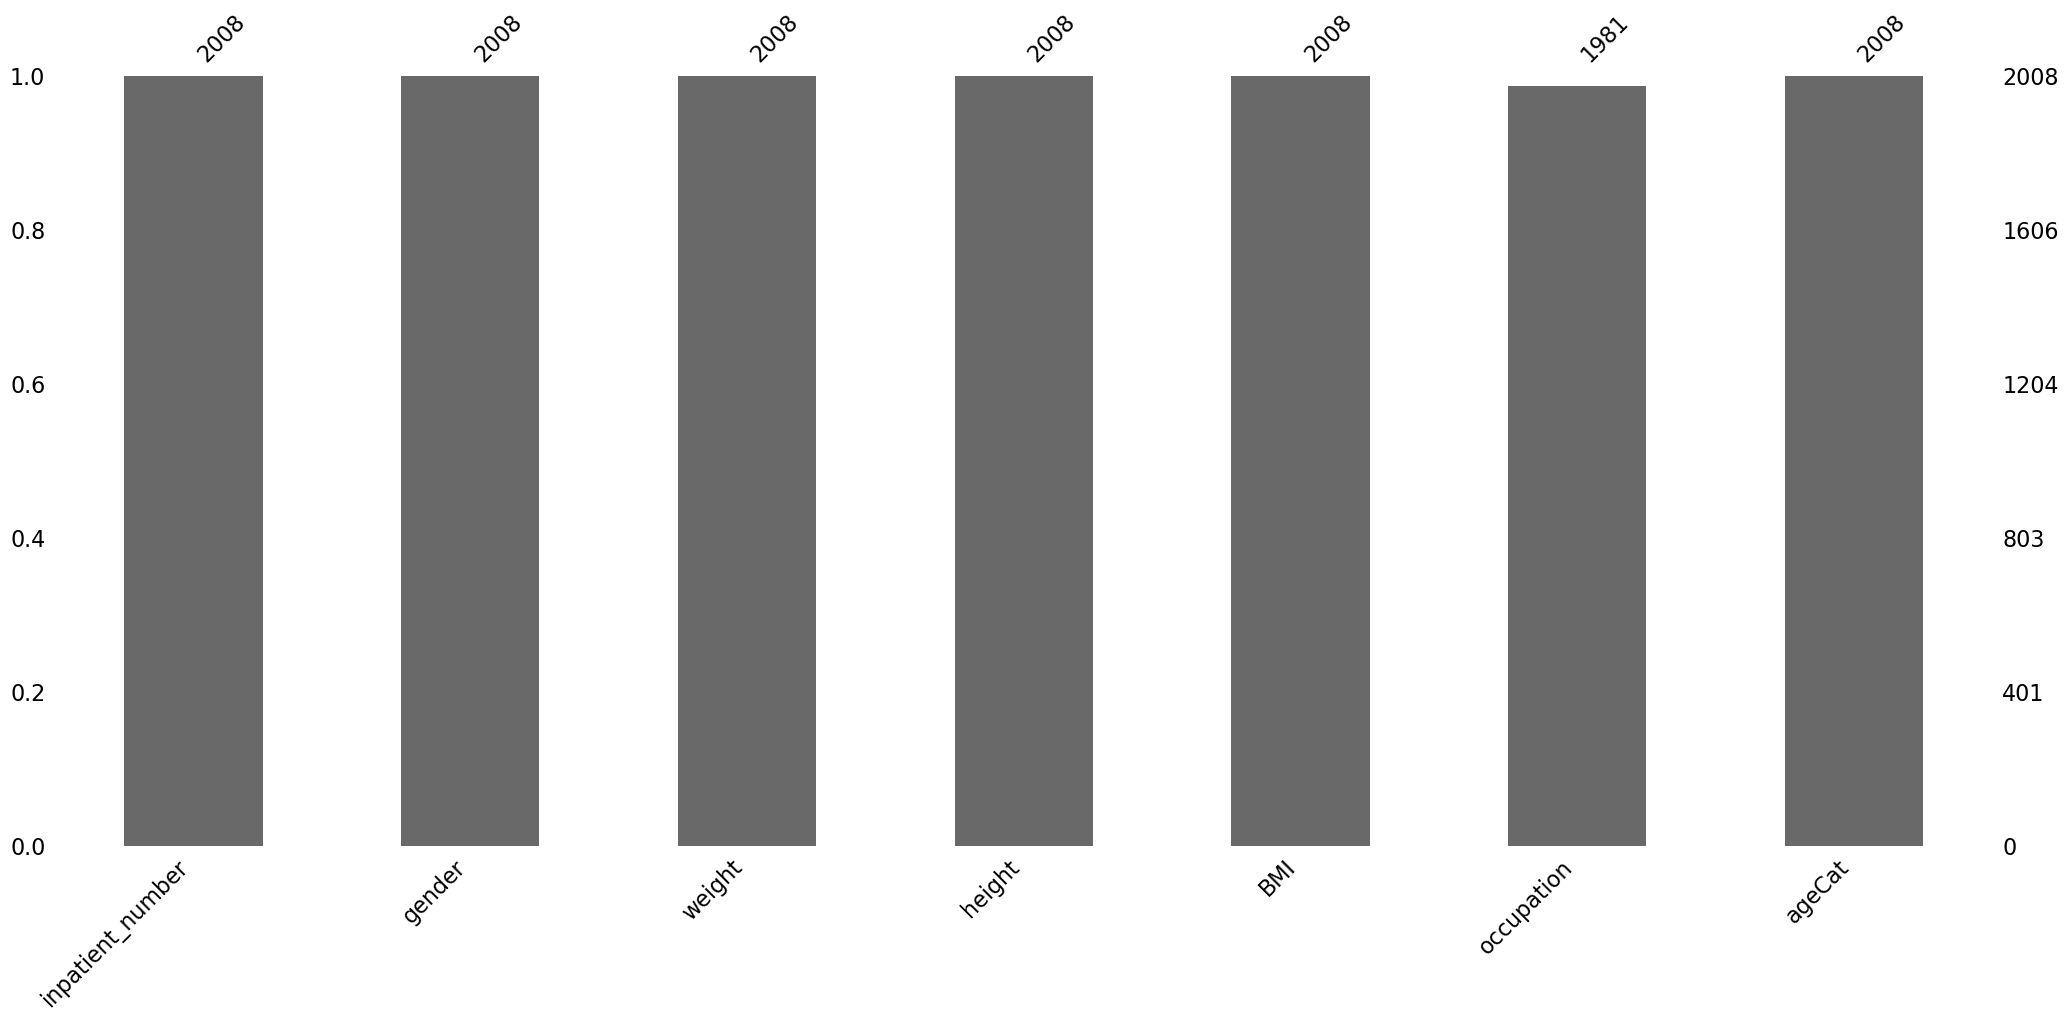

In [286]:

import missingno as msno 
  
# Loading the dataset 
df_missing=pd.read_excel("Cardiac_Outcomes.xlsx","Demography")
# Visualize the number of missing 
# values as a bar chart 
msno.bar(df_missing) 
#msno.heatmap(df_missing)

Q8.Create a Waffle chart to show what percentage of total deaths belong to each admission_ward?

In [289]:
pip install pywaffle

  Obtaining dependency information for pywaffle from https://files.pythonhosted.org/packages/9d/47/fbed7d28daf02da231e88d3d1b2a92e292327884c716a4e88bc930bacbd4/pywaffle-1.1.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for fontawesomefree from https://files.pythonhosted.org/packages/8f/fc/295f4f71fc157de68dcf25a4850953e61f6eca644e7416f10a281ed42441/fontawesomefree-6.5.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/25.6 MB 660.6 kB/s eta 0:00:39
   ---------------------------------------- 0.2/25.6 MB 2.1 MB/s eta 0:00:13
    --------------------------------------- 0.6/25.6 MB 4.4 MB/s eta 0:00:06
   - -------------------------------------- 1.1/25.6 MB 6.5 MB/s eta 0:00:04
   -- ------------------------------------- 1.6/25.6 MB 7.2 MB/s eta 0:00:04
   --- ------------------------------------ 2.2/25.6 MB 8.1 MB/s eta 0:00:03
   --- ------------------------------------ 2.

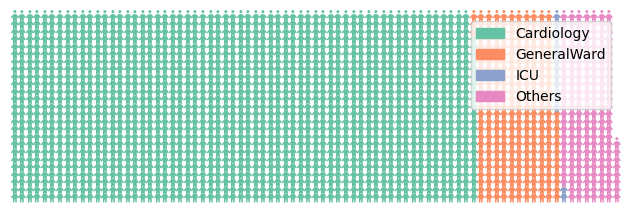

In [292]:
import pandas as pd 
import matplotlib.pyplot as plt 
from pywaffle import Waffle 

df_waffle=pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge",usecols="C,K")
df_waffle
df_waffle.groupby('admission_ward').count()
data ={'admission_ward': ['Cardiology', 'GeneralWard', 
                 'ICU', 'Others'], 
      'no_of_deaths': [1547, 265, 15, 181] 
     } 
  
df = pd.DataFrame(data) 
#To plot the waffle Chart 
fig = plt.figure( 
      FigureClass = Waffle, 
       rows = 25, 
       values = df.no_of_deaths, 
       labels = list(df.admission_ward),
       icons='child'
)

# Q9.Create any 2 2-D arrays and perform matrix multiplication. Display the resulting array.

In [277]:
#creating 2-D array
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [278]:
B= np.array([[3, 4, 5], [9, 10, 11],[2,3,4]])
print(B)

[[ 3  4  5]
 [ 9 10 11]
 [ 2  3  4]]


In [279]:
res=np.dot(A,B)
res

array([[27, 33, 39],
       [69, 84, 99]])

Q10. Display the percentage of missing values in each column in the table labs. Show the distribution as a bar graph

In [293]:
import pandas as pd
df_Labs=pd.read_excel("Cardiac_Outcomes.xlsx","Labs")
df_Labs

,inpatient_number,body_temperature,pulse,respiration,systolic_blood_pressure,diastolic_blood_pressure,map,fio2,creatinine_enzymatic_method,urea,...,measured_residual_base,measured_bicarbonate,carboxyhemoglobin,body_temperature_blood_gas,oxygen_saturation,partial_oxygen_pressure,oxyhemoglobin,anion_gap,free_calcium,total_hemoglobin
0,857781,36.7,87,19,102,64,76.666667,33,108.3,12.55,...,-2.1,21.2,0.4,37.0,97.0,93.0,95.9,17.8,1.14,125.0
1,743087,36.8,95,18,150,70,96.666667,33,62.0,4.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,866418,36.5,98,18,102,67,78.666667,33,185.1,15.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,775928,36.0,73,19,110,74,86.000000,33,104.8,8.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,810128,35.0,88,19,134,62,86.000000,33,83.9,6.86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,740689,36.1,117,22,120,80,93.333333,33,115.3,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,734280,36.3,70,21,120,86,97.333333,29,63.1,5.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,781004,36.8,113,19,135,100,111.666667,33,51.9,4.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,744870,36.4,134,19,92,72,78.666667,41,191.1,35.87,...,-2.5,18.8,0.3,37.0,96.0,84.0,95.6,21.8,0.94,139.0


In [294]:
df1_1=(df_Labs.isnull().sum(axis = 0)/2008)*100
#data frame showing the percentage of missing values in each column of the sheet Labs
df1_1

inpatient_number            0.000000
body_temperature            0.000000
pulse                       0.000000
respiration                 0.000000
systolic_blood_pressure     0.000000
                             ...    
partial_oxygen_pressure    50.547809
oxyhemoglobin              50.597610
anion_gap                  50.547809
free_calcium               50.547809
total_hemoglobin           50.597610
Length: 107, dtype: float64

<Axes: >

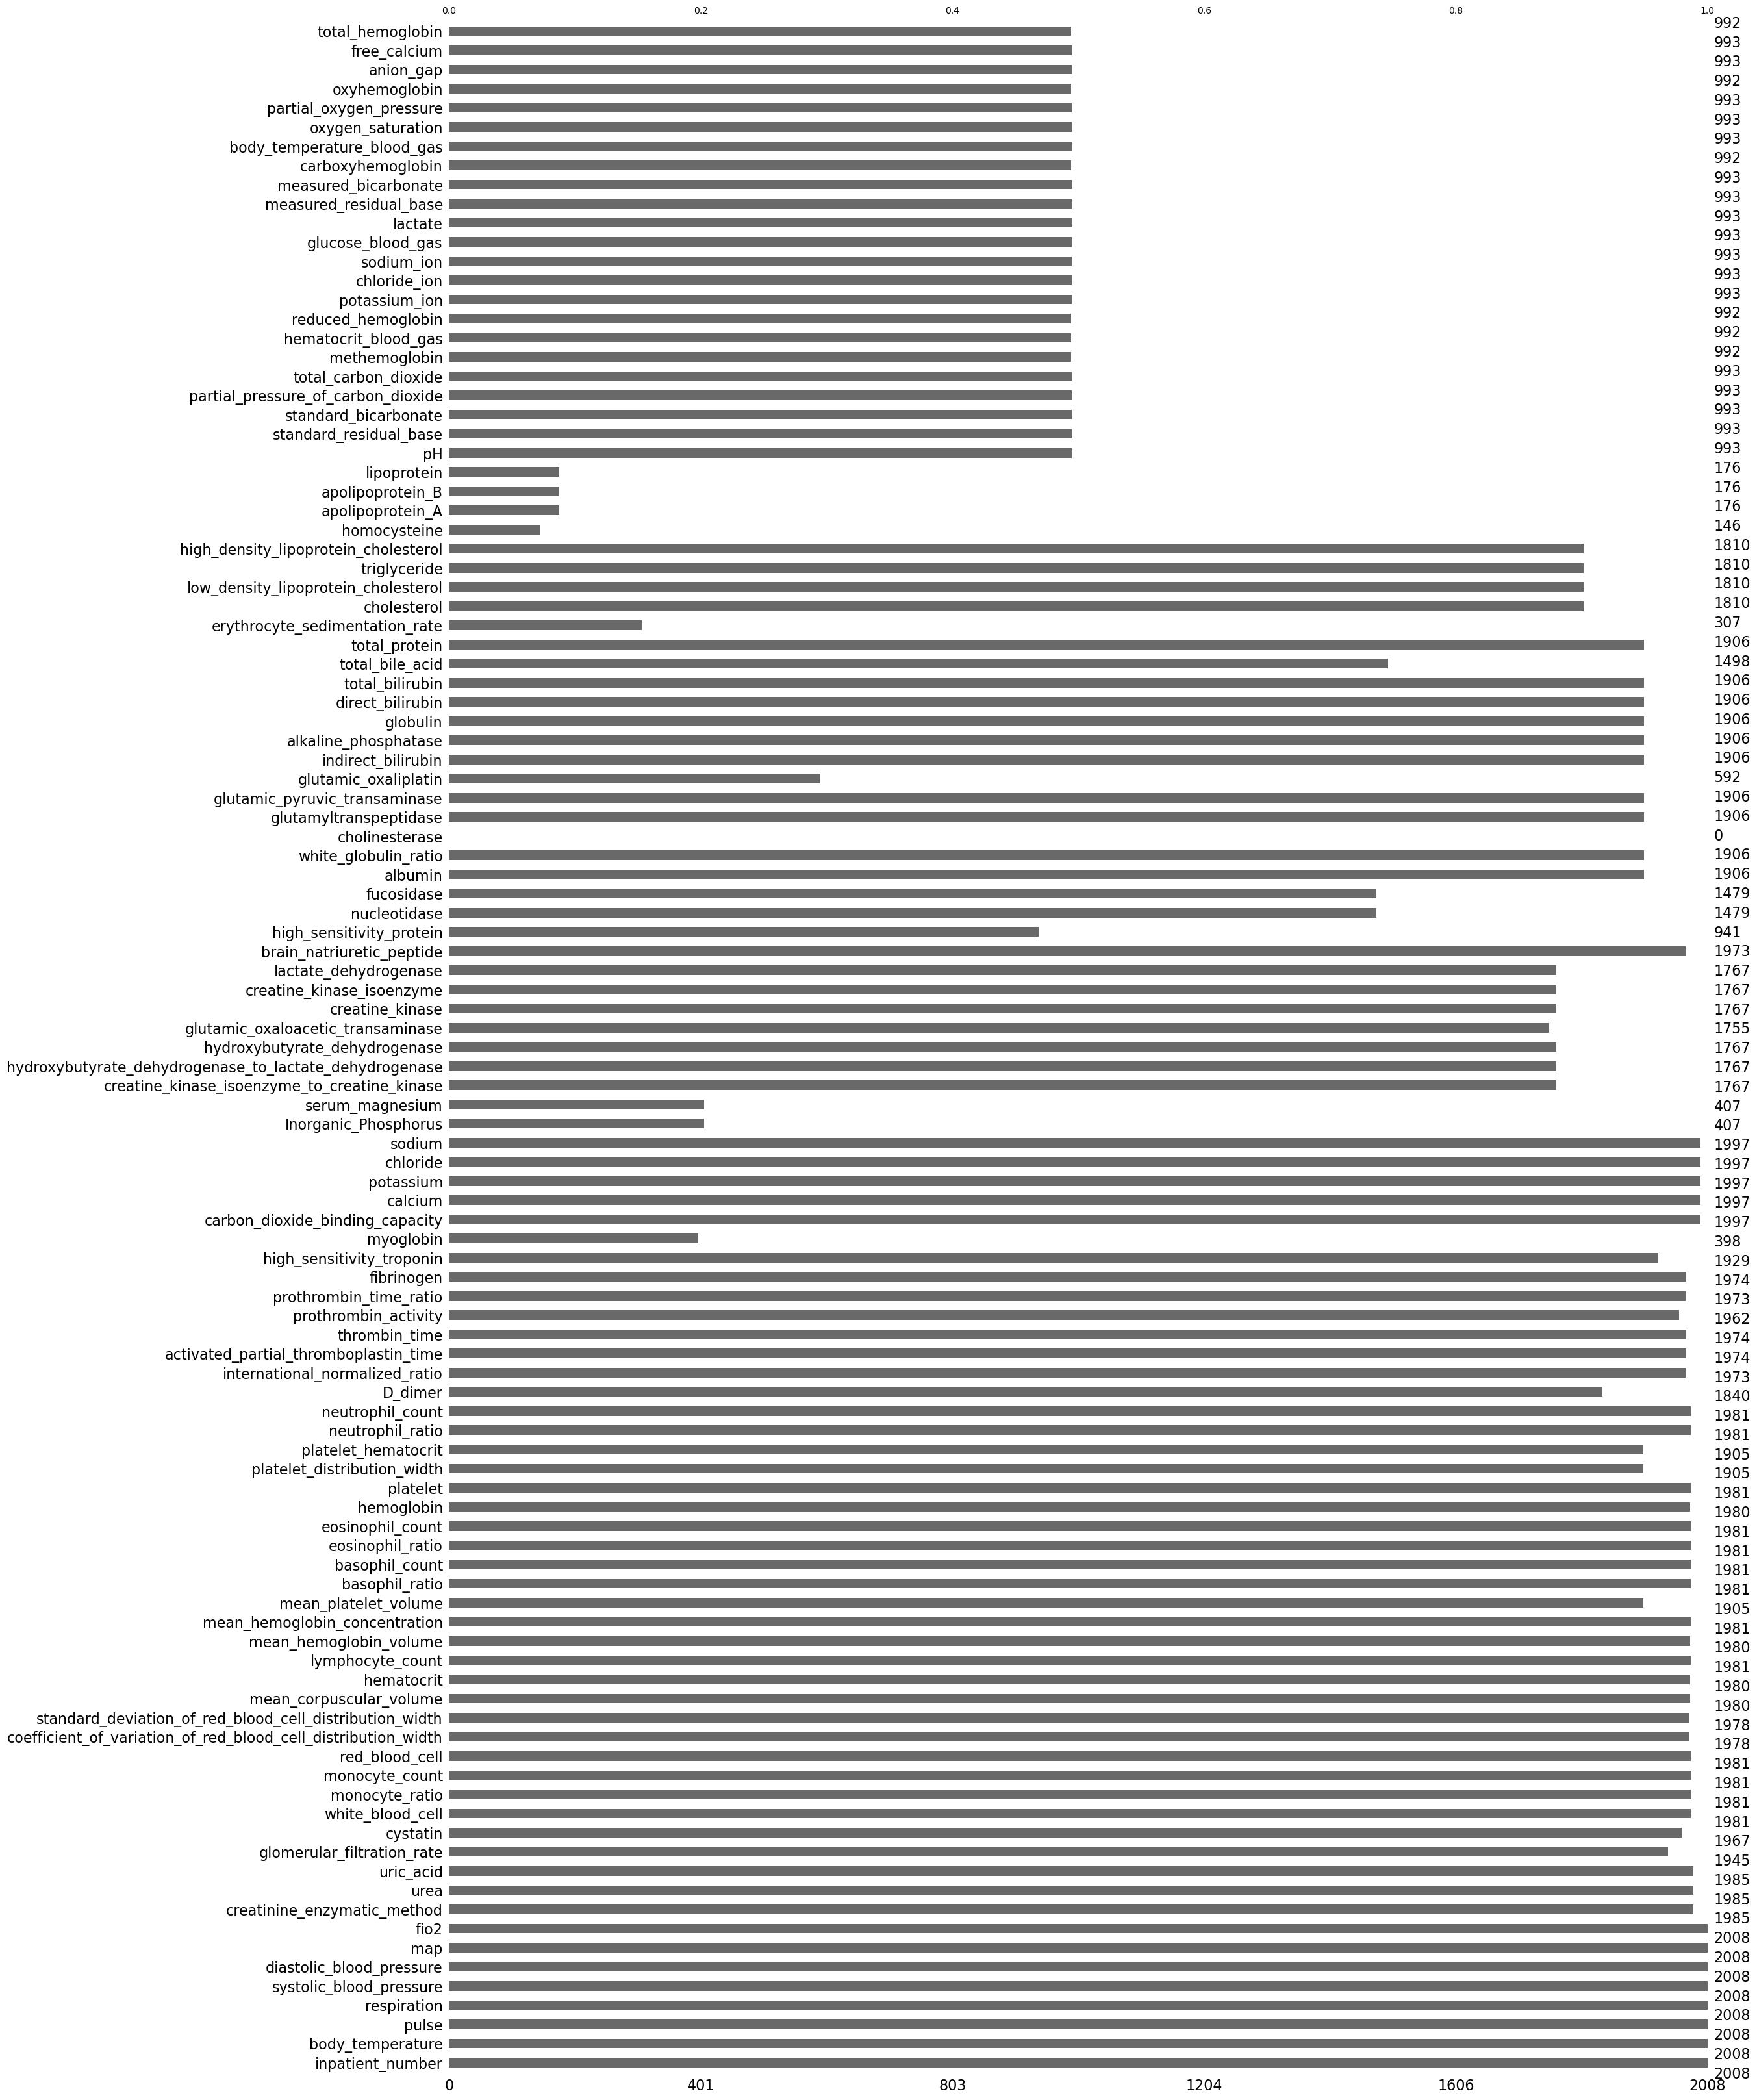

In [296]:
import matplotlib.pyplot as plt
import pandas as pd 
import missingno as msno 
# Loading the dataset 
df_Labs=pd.read_excel("Cardiac_Outcomes.xlsx","Labs")  
msno.bar(df_Labs) 

# Q11.A valid mobile number is a ten digit number starting with a 7,8 or 9. For every string listed, print "YES" if it is a valid mobile number and "NO" if it is not on separate lines. Do not print the quotes.

In [297]:
df_mob=df = pd.DataFrame({
    'mobile number': [2,9587456281,1252478965,7397260044],
    'Valid or not': ['No', 'Yes', 'No', 'Yes']})
df_mob

,mobile number,Valid or not
0,2,No
1,9587456281,Yes
2,1252478965,No
3,7397260044,Yes


# Q12.If left ventricular end diastolic diameter has a normal range: 3.5 - 5.6 cm, how many patients fall outside that limit and what is the MAP of most patients with this condition?

In [298]:
df_map=pd.read_excel("Cardiac_Outcomes.xlsx","Labs",usecols="A,G")
df_map
df_LV=pd.read_excel("Cardiac_Outcomes.xlsx","CardiacComplications",usecols="I")
df_LV
df_MapLV = pd.concat([df_map, df_LV], axis=1)
df_MapLV
df_MapLV = df_MapLV.dropna(how='any',axis=0) 
df_MapLV
newdf = df_MapLV.where(df_MapLV["left_ventricular_end_diastolic_diameter_LV"] < 3.5)
newdf
newdf = df_MapLV.where(df_MapLV["left_ventricular_end_diastolic_diameter_LV"] > 5.6)
newdf
print("The no of patients whose left_ventricular_end_diastolic_diameter_LV is outside the normalrange is", len(newdf.index))

The no of patients whose left_ventricular_end_diastolic_diameter_LV is outside the normalrange is 1311


# Q13.Create a bar chart between lengthofstay and body temperature, classified as: Hypothermia, within range or hyperthermia

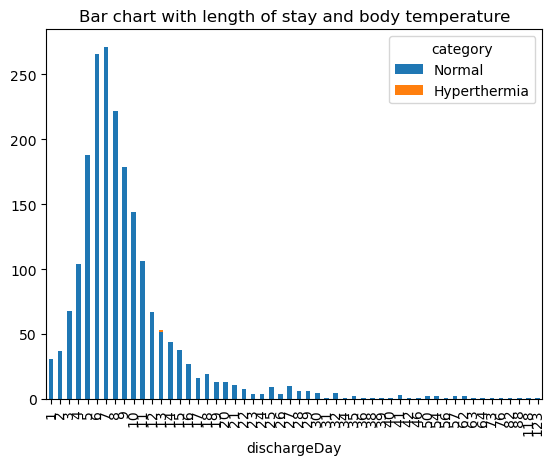

In [300]:
df_lengthofstay=pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge",usecols="I")
df_lengthofstay
df_bodytemperature=pd.read_excel("Cardiac_Outcomes.xlsx","Labs",usecols="B")
df_bodytemperature
df_merged1 = pd.concat([df_lengthofstay, df_bodytemperature], axis=1)
df_merged1 = pd.concat([df_lengthofstay, df_bodytemperature], axis=1)
df_merged1
df_merged1['category'] = 'Normal'
df_merged1


df_merged1['body_temperature']=df_merged1['body_temperature'].astype(str)

df_merged1.loc[df_merged1['body_temperature']<"35" ,['category']]='Hypothermia'
df_merged1.loc[df_merged1['body_temperature']>="41" ,['category']]='Hyperthermia'
df_merged1
import matplotlib.pyplot as plt
#df_merged1.plot.bar()
df2 = df_merged1.groupby(['dischargeDay', 'category'])['dischargeDay'].count().unstack('category').fillna(0)
df2
df2[['Normal', 'Hyperthermia']].plot(kind='bar', stacked=True)# hypothermia where body temperature is less than 35 is not prresent in dataset
plt.title("Bar chart with length of stay and body temperature")
plt.show()

# Q14.Find the list of patients whose DischargeDay is greater than the value given by the user

In [1]:
val = int(input("Enter your value: ") )
print(val)

Enter your value:  10


10


In [4]:
import pandas as pd
df_dischargeday=pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge",usecols="I,A")
df_dischargeday

,inpatient_number,dischargeDay
0,857781,11
1,743087,8
2,866418,5
3,775928,11
4,810128,5
...,...,...
2003,740689,5
2004,734280,8
2005,781004,14
2006,744870,1


# Q15.Display a pie chart of number of patients in each category listed

<Axes: ylabel='no_of_patients'>

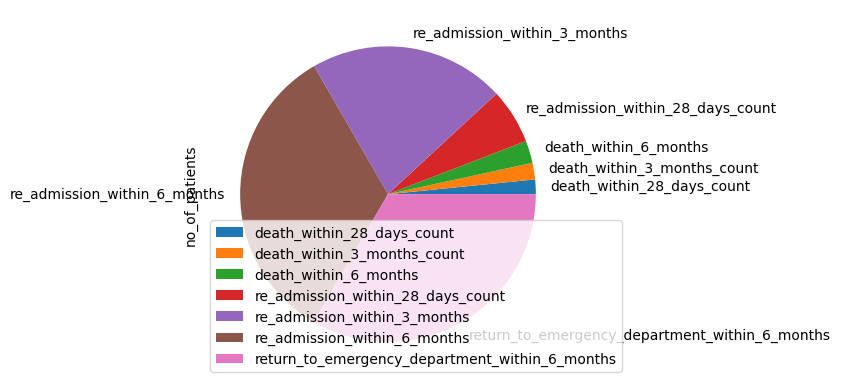

In [8]:
df_pie=pd.read_excel("Cardiac_Outcomes.xlsx","Hospitalization_Discharge",usecols="L,M,N,O,P,Q,T")
df_pie
death_within_28_days_count = df_pie.death_within_28_days.sum()
re_admission_within_28_days_count=df_pie.re_admission_within_28_days.sum()
death_within_3_months_count=df_pie.death_within_3_months.sum()
re_admission_within_3_months=df_pie.re_admission_within_3_months.sum()
death_within_6_months=df_pie.death_within_6_months.sum()
re_admission_within_6_months=df_pie.re_admission_within_6_months.sum()
return_to_emergency_department_within_6_months=df_pie.return_to_emergency_department_within_6_months.sum()
df_no_ofpatients=pd.DataFrame({'Category': ['death_within_28_days_count', 're_admission_within_28_days_count', 'death_within_3_months_count', 
                                   're_admission_within_3_months', 'death_within_6_months','re_admission_within_6_months','return_to_emergency_department_within_6_months' ], 
                          'no_of_patients': [death_within_28_days_count,re_admission_within_28_days_count,death_within_3_months_count,re_admission_within_3_months,death_within_6_months,re_admission_within_6_months,return_to_emergency_department_within_6_months]}) 
  
# Plotting the pie chart for above dataframe 
df_no_ofpatients.groupby(['Category']).sum().plot(kind='pie', y='no_of_patients')

Q16.Create a pivot table with myocardial_infarction, congestive_heart_failure,peripheral_vascular_disease as rows and average Uric Acid and BMI as columns, using melt functions

In [9]:
df_rows=pd.read_excel("Cardiac_Outcomes.xlsx","CardiacComplications",usecols="D,E,F")
df_cols1=pd.read_excel("Cardiac_Outcomes.xlsx","Labs",usecols="K")
df_cols2=pd.read_excel("Cardiac_Outcomes.xlsx","Demography",usecols="E")
df_pivot = pd.concat([df_rows, df_cols1,df_cols2], axis="columns")
df_pivot
#

,myocardial_infarction,congestive_heart_failure,peripheral_vascular_disease,uric_acid,BMI
0,0,0,0,685.0,18.590125
1,0,0,0,170.0,19.195303
2,0,0,0,567.0,24.221453
3,0,0,0,635.0,22.491349
4,0,0,0,432.0,31.633715
...,...,...,...,...,...
2003,0,1,0,739.0,15.555556
2004,0,1,0,396.0,20.811655
2005,0,1,0,377.0,25.951557
2006,0,1,0,1409.0,17.777778


# Q65.Which Admission Ward has maximum number of visits scheduled

In [199]:
Visit_countMax = df_Hospitalization_Discharge.groupby('admission_ward')["visit_times"].idxmax()
Visit_countMax
Visit_countMax.head(1)


admission_ward
Cardiology    1225
Name: visit_times, dtype: int64

# Q66.Display total count of patients in each discharge_department based on gender

In [167]:
#df_merged = pd.concat([df_Demography, df_Hospitalization_Discharge])
#df_grouped = merged_df.groupby(['discharge_department','gender']).size().unstack()
#df_grouped
df1=df_Hospitalization_Discharge
df2=df_Demography
df_Merged=pd.merge(df1,df2)
df_Merged
df_grouped = df_Merged.groupby(['discharge_department','gender']).size().unstack()
df_grouped

gender,Female,Male
discharge_department,,
Cardiology,993,710
GeneralWard,137,104
ICU,5,7
Others,28,24


# Q67.How many Unique patients were precribed each type of medication?

In [106]:
Unique_patients_Per_Medication = df_Patient_Precriptions.groupby('Drug_name')['inpatient_number'].nunique()
Unique_patients_Per_Medication

Drug_name
Aspirin enteric-coated tablet                        958
Atorvastatin calcium tablet                          822
Benazepril hydrochloride tablet                      434
Clopidogrel Hydrogen Sulphate tablet                 401
Deslanoside injection                               1017
Digoxin tablet                                       999
Dobutamine hydrochloride injection                    22
Enoxaparin Sodium injection                          113
Furosemide injection                                1720
Furosemide tablet                                   1641
Heparin Sodium injection                             153
Hydrochlorothiazide tablet                           283
Isoprenaline Hydrochloride injection                  30
Isosorbide Mononitrate Sustained Release tablet      326
Meglumine Adenosine Cyclophosphate for injection    1115
Metoprolol Succinate Sustained-release tablet        523
Milrinone injection                                  709
Nitroglycerin injecti

# Q68.Find 5 patients with the highest Discharge days greater than 20. List their most common outcome

In [111]:
Filtered_patients = df_Hospitalization_Discharge[df_Hospitalization_Discharge['dischargeDay'] > 20]
#Filtered_patients
#selected_columns = df_Hospitalization_Discharge.loc[:, ['inpatient_number', 'dischargeDay', 'outcome_during_hospitalization']]
#selected_columns
Top_5_patients = Filtered_patients.nlargest(5, 'dischargeDay')
Top_5_patients
selected_columns=Top_5_patients.loc[:, ['inpatient_number', 'dischargeDay', 'outcome_during_hospitalization']]
selected_columns

,inpatient_number,dischargeDay,outcome_during_hospitalization
884,794077,123,Alive
1613,768711,118,Alive
1548,791880,88,Alive
1573,794784,82,Alive
1513,757711,76,Alive


# Q69.Get the list of patient ID's which are not there in prescriptions but in demographics

In [112]:
Demographics_IDs = set(df_Demography['inpatient_number'])
Prescriptions_IDs = set(df_Patient_Precriptions['inpatient_number'])
Missing_IDs = Demographics_IDs - Prescriptions_IDs
Missing_IDs_List = list(Missing_IDs)
Missing_IDs_List

[789308]

# Q70.On average, what is the most frequent weekday of admission?

In [121]:
df_Hospitalization_Discharge['weekday'] = pd.to_datetime(df_Hospitalization_Discharge['Admission_date']).dt.dayofweek
Weekday_count = df_Hospitalization_Discharge['weekday'].value_counts()
Most_Frequent_Weekday = Weekday_count.index[0]
Weekday_Names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
Most_Frequent_Weekday_Name = Weekday_Names[Most_Frequent_Weekday]
f"On average, the most frequent weekday of admission is {Most_Frequent_Weekday_Name}"

'On average, the most frequent weekday of admission is Monday'

# Q71.Which year had the maximum admissions

In [132]:
df_Hospitalization_Discharge['year'] = pd.to_datetime(df_Hospitalization_Discharge['Admission_date']).dt.year
Max_Admissions_Year = df_Hospitalization_Discharge['year'].value_counts().idxmax()
f"The year with the maximum admissions is {Max_Admissions_Year}"

'The year with the maximum admissions is 2016'

# Q72.What % of the dataset is male vs female?

In [141]:
#Male_count = df_Demography['gender'].value_counts()['Male']
#Female_count = df_Demography['gender'].value_counts()['Female']
#Male_count
#Female_count
#Male_percentage = (Male_count / Total_Patients) * 100
#Female_percentage = (Female_count / Total_Patients) * 100
#Male_percentage
#Female_percentage
Gender_Count = df_Demography['gender'].value_counts()
Gender_Count
Total_Patients = len(df_Demography)
Gender_Percentage=(Gender_Count / Total_Patients) * 100
Gender_Percentage

gender
Female    57.918327
Male      42.081673
Name: count, dtype: float64

# Q73.Which patient in the youngest age category weighs the most?

In [196]:
df_Demography=pd.read_excel("Cardiac_Outcomes.xlsx","Demography")
df_YoungestAge = df_Demography[df_Demography.ageCat == df_Demography.ageCat.min()]
df_MaxWeight = df_YoungestAge.loc[df_YoungestAge['weight'].idxmax()]
#df_MaxWeight
Selected_Rows = df_MaxWeight[["inpatient_number","weight","ageCat"]]
Selected_Rows

inpatient_number    831184
weight                82.5
ageCat               21-29
Name: 1092, dtype: object

# Q74.Which adm ward had the lowest rate of Outcome Death?

In [166]:
Death_Rate = df_Hospitalization_Discharge.groupby('admission_ward')['outcome_during_hospitalization'].apply(lambda x: (x == 'Dead').sum() / len(x))
Lowest_Death_Rate_Outcome = Death_Rate.idxmin()
Lowest_Death_Rate_Outcome

'GeneralWard'

# Q75.What % of those with an outcome of death, had myocardial infarction?

In [128]:
#df1=df_Hospitalization_Discharge
#df2=df_CardiacComplications
#df_Merged=pd.merge(df1,df2)
#df_Merged
#df_Death = df_Merged[df_Merged['outcome_during_hospitalization'] == 'dead']
#df_Death
#df_MI = df_Merged[df_Merged['myocardial_infarction'] == '1']
#df_MI
#Total_DeathCount = len(df_Death)
#Total_DeathCount
#Total_MIcount=len(df_MI)
#Percentage_MI_Death=(Total_MIcount/Total_DeathCount)*100
#Percentage_MI_Death
DeathOutcome_count = df_Hospitalization_Discharge[df_Hospitalization_Discharge['outcome_during_hospitalization'] == 'Dead'][['inpatient_number','outcome_during_hospitalization']]
#DeathOutcome_count
Total_DeathCount=DeathOutcome_count['outcome_during_hospitalization'].value_counts().to_frame('count')
Total_DeathCount

,count
outcome_during_hospitalization,
Dead,11


In [118]:
Patient_MI = df_CardiacComplications[df_CardiacComplications['myocardial_infarction'] >0]
Patient_MI
Total_MI_Count=Common_inpatient_number['myocardial_infarction'].value_counts().to_frame('count')
Total_MI_Count
#Common_inpatient_number = pd.merge(DeathOutcome_count,Patient_MI, how='inner', on=['inpatient_number'])
#Common_inpatient_number

,count
myocardial_infarction,
1,1


In [116]:
Percentage_MI_Death=(1/11)*100
Percentage_MI_Death

9.090909090909092

# Q76.What is the ratio of those with congestive heart failure to those who had type of heart failure Both?

In [119]:
CHF_Patients = df_CardiacComplications[df_CardiacComplications['congestive_heart_failure'] > 0]
#CHF_Patients
CHF_Count=CHF_Patients['congestive_heart_failure'].value_counts().to_frame('count')
CHF_Count


,count
congestive_heart_failure,
1,1872


In [120]:
Typeof_HF_Patients = df_CardiacComplications[df_CardiacComplications['type_of_heart_failure'] == 'Both']
#Typeof_HF_Patients
Typeof_HF_Count=Typeof_HF_Patients['type_of_heart_failure'].value_counts().to_frame('count')
Typeof_HF_Count

,count
type_of_heart_failure,
Both,1480


In [125]:
CHF_Typeof_HF_Ratio=1872/1480
CHF_Typeof_HF_Ratio
#Ratio=CHF_Count['>0'] / Typeof_HF_Count['Both']
#Ratio

1.2648648648648648

# Q77.LIst the number of cardiogenic shock patients based on hospitalization outcome, having a severe GCS score(higher risk of death) 

In [263]:
Hospitalization_outcome= df_Hospitalization_Discharge[df_Hospitalization_Discharge['outcome_during_hospitalization'] == 'Dead'][['inpatient_number','outcome_during_hospitalization']]
#Hospitalization_outcome
GCSscore_Death= df_Responsivenes[df_Responsivenes['GCS'] <8]
#GCSscore_Death
df_Merged=pd.merge(Hospitalization_outcome,GCSscore_Death)
df_Merged

,inpatient_number,outcome_during_hospitalization,eye_opening,verbal_response,movement,consciousness,GCS
0,834443,Dead,1,1,1,Nonresponsive,3
1,854580,Dead,1,1,1,Nonresponsive,3
2,765343,Dead,1,1,1,Nonresponsive,3
3,805475,Dead,1,1,1,Nonresponsive,3
4,750447,Dead,1,1,1,Nonresponsive,3


# Q78.Give the count of patients who have experinced tachicardia or bradycardia.

In [267]:
Pulse_Range = [df_Labs['pulse'] <60,df_Labs['pulse'] >60,df_Labs['pulse'] >99]
Pulse_Categories = ['brachycardia','Normal','tachycardia']
df['Pulse_Categories'] = np.select(Pulse_Range,Pulse_Categories)
df['Pulse_Categories']
Patients_PulseCategories = df['Pulse_Categories'] .value_counts()
Patients_PulseCategories
Brachycardia=Patients_PulseCategories.iloc[1]
f"The count of patients who have Brachycardia is {Brachycardia}"

'The count of patients who have Brachycardia is 154'

# Q79.Create a Funnel chart of BMI Category(Normal Weight, Underweight and Obese)

In [224]:
BMI_Range = [df_Demography['BMI'] < 18.5,df_Demography['BMI'] < 25,df_Demography['BMI'] < 30,df_Demography['BMI'] >= 30]
BMI_Categories = ['Underweight', 'Normal Weight', 'Overweight', 'Obese']
df['BMI_categories'] = np.select(BMI_Range,BMI_Categories)
df['BMI_categories']
BMI_CategoryCounts = df['BMI_categories'].value_counts()
BMI_CategoryCounts

BMI_categories
Normal Weight    1184
Underweight       511
Overweight        243
Obese              70
Name: count, dtype: int64

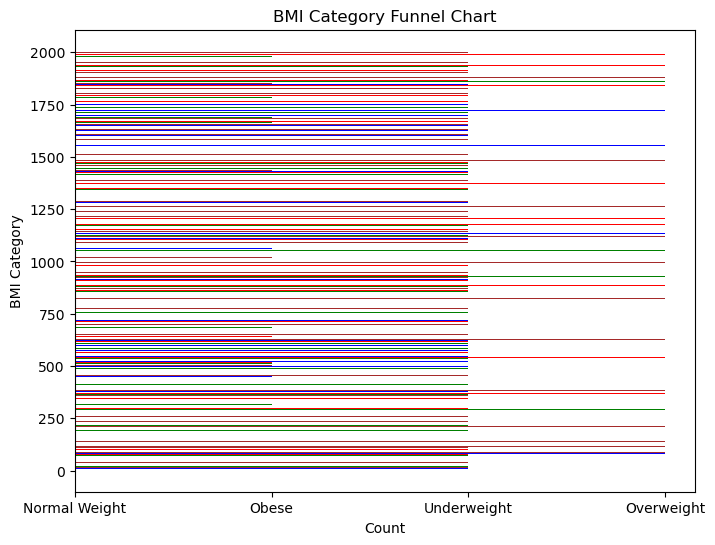

In [213]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.barh(df['BMI_categories'].index,df['BMI_categories'].values, color=['green','red','blue','brown'])
plt.xlabel('Count')
plt.ylabel('BMI Category')
plt.title('BMI Category Funnel Chart')
plt.show()

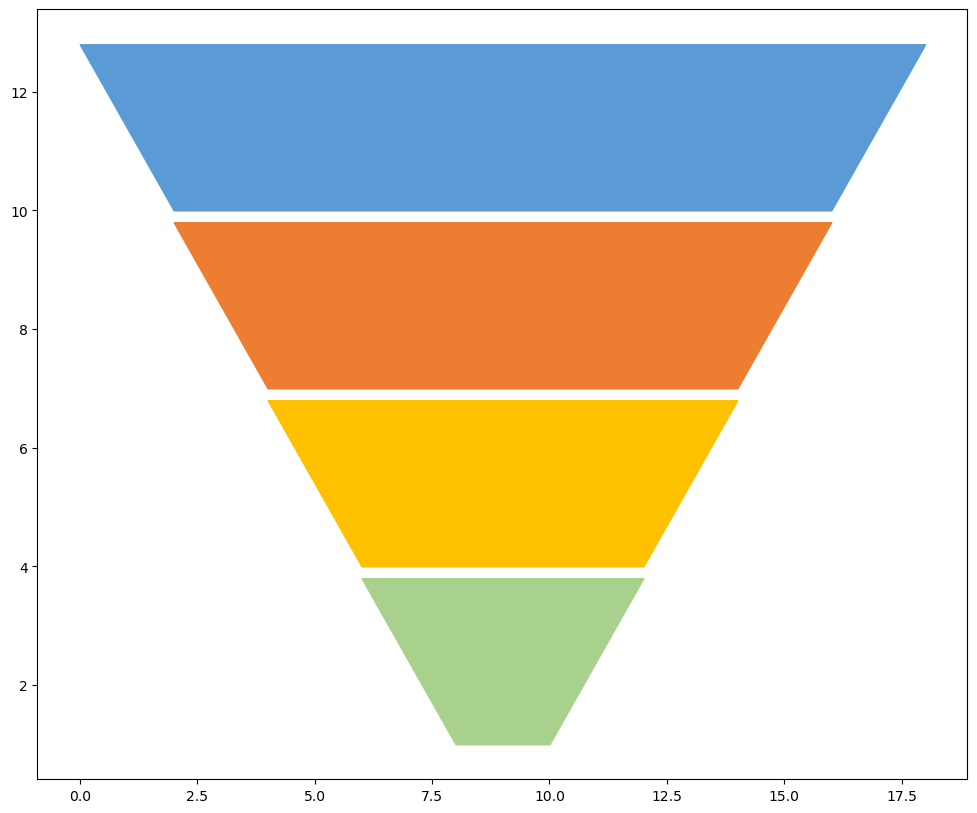

In [250]:
colors=["#a9d18e","#ffc000","#ed7d31","#5b9bd5"]
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12,10))
plt.fill_betweenx(y=[1,3.8],x1=[10,12],x2=[8,6],color=colors[0]);
plt.fill_betweenx(y=[4,6.8],x1=[12,14],x2=[6,4],color=colors[1]);
plt.fill_betweenx(y=[7,9.8],x1=[14,16],x2=[4,2],color=colors[2]);
plt.fill_betweenx(y=[10,12.8],x1=[16,18],x2=[2,0],color=colors[3]);

#plt.xticks([],[]);
#plt.yticks([2,5,8,11]),df1["BMI_categories"] ;
#plt.ylabel("stages");
#for y,value in zip([2,5,8,11],df["BMI_CategoryCounts"]):
    #plt.text(9,y,value,fontsize=16,fontweight="bold",color="brown");
#plt.title("BMI Category Funnel Chart",loc="center",fontsize=25,fontweight="bold");


In [259]:
import plotly.graph_objects as go
fig =go.Figure( go.Funnel(
    y = df['BMI_categories'].index,
    x = df['BMI_categories'].values,
    textposition = 'inside',
    textinfo = 'value+percent initial',
    opacity=0.65,
       marker={
        "color": ["deepskyblue", "lightsalmon", "tan"],
                  "line": {"width": [4, 2, 2], "color": "wheat"} },
       connector={"line": {"color": "royalblue", "dash": "dot", "width": 3}}))
fig.show()
#fig.title("BMI Category Funnel Chart",title_font_size=24,font_size=18)

# Q80.Delete the column age from Q26 iteratively.

In [197]:
import random as rd
import random
df1=df_Demography["ageCat"]
df['Age'] = [random.randint(1, 100) for _ in range(len(df1))]
df['Age']
df.drop(['Age'],axis=1,inplace=True)   